## Problem Set 3

#### Lucas Santiago Benjamin Belmudes, Hasan Cetin

---

Exercise 1 and 2:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from scipy.interpolate import interp1d

Use one-sided finite differences to compute an approximation to the first derivative of $g(p)=$ $0.5 p^{-0.5}+0.5 p^{-0.2}$ at $p=1.5$. Let the increment $\epsilon$ in the finite differences range across all the values in the set $\left\{10^{-1}, 10^{-2}, \ldots, 10^{-10}\right\}$. For which value of $\epsilon$ the approximate first derivative the most accurate? Repeat the third problem using two-sided finite differences to approximate the first derivative

In [2]:
def g(p):
    return 0.5*p**(-0.5) + 0.5*p**(-0.2)

def OSD(p, Δ):
    return (g(p+Δ) - g(p))/ Δ 

def TSD(p, Δ):
    return (g(p+Δ) - g(p-Δ))/ (2*Δ) 

OSD = np.vectorize(OSD)
TSD = np.vectorize(TSD)

We can compute the derivative at the point algebraically and then compute the error in the estimation:

In [36]:
ϵ= 10**(-1* np.linspace(1,10,10))
p_point = np.linspace(1,1,10) * 1.5
truth = -(0.5**2) * 1.5**(-1.5) - 0.5 * 0.2 * 1.5**(-1.2)

#Compute the error of each estimation: 

error_OSD = OSD(p_point, ϵ) - truth
error_TSD = TSD(p_point, ϵ) - truth

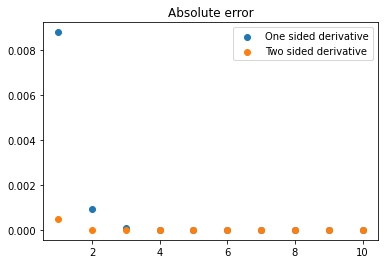

In [37]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10), np.abs(error_OSD), label="One sided derivative")
ax.scatter(np.linspace(1,10,10), np.abs(error_TSD), label="Two sided derivative")
plt.title("Absolute error")
plt.legend()
plt.show()

It seems that one sided derivative is less precise than two sided derivative. We now analyse the same graph but without the first observation

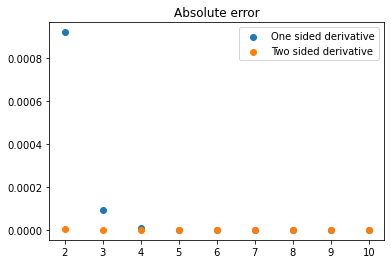

In [38]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10)[1:], np.abs(error_OSD)[1:], label="One sided derivative")
ax.scatter(np.linspace(1,10,10)[1:], np.abs(error_TSD)[1:], label="Two sided derivative")
plt.title("Absolute error")
plt.legend()
plt.show()

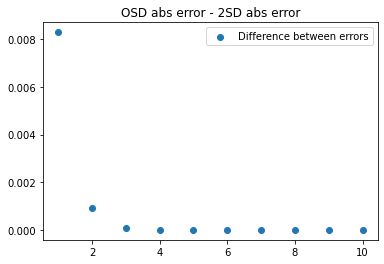

In [39]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10),np.abs(error_OSD) - np.abs(error_TSD), label="Difference between errors")
plt.title("OSD abs error - 2SD abs error")
plt.legend()
plt.show()

In [40]:
np.min(np.abs(error_OSD)), ϵ[np.argmin(np.abs(error_OSD))]

(8.742384205451259e-09, 1e-08)

In [41]:
np.min(np.abs(error_TSD)), ϵ[np.argmin(np.abs(error_TSD))]

(6.1732008393988735e-12, 1e-05)

The minimum absolute error for the one sided derivative is achieved when $\Delta=10^{-08}$. The minimum absolute error for the two sided derivative is achieved when $\Delta=10^{-05}$. At the minimum, the Two sided derivative has a smaller absolute error compare to the One sided derivative. For a more detailed discussion see the pdf attached.

Exercises 3 and 4:

Use the bisection, secant, and Newton's methods to compute an estimate of $p_0$, where $g\left(p_0\right)=$ $0.75$ (and $g$ is defined in the first problem). For each method, report how many iterations are required to compute an estimate $\hat{p}$ satisfying $\left|f(\hat{p})-f\left(p_0\right)\right|<10^{-6}$.

Repeat the last problem using Brent's method as described in Chapter $9.3$ of Numerical Recipes in Fortran.

In [42]:
precision = 10**(-6)

def g_tilda(p):
    return 0.5*p**(-0.5) + 0.5*p**(-0.2) - 0.75

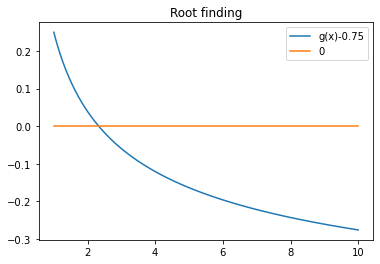

In [43]:
ax, fig = plt.subplots()
plt.plot(np.linspace(1,10,100), g_tilda(np.linspace(1,10,100)), label="g(x)-0.75")
plt.plot(np.linspace(1,10,100), np.zeros(100), label="0")
plt.title("Root finding")
plt.legend()
plt.show()

In [44]:
def secant(x0,x1,e,N):
    step = 1
    condition = True
    while condition:
        x2 = x0 - (x1-x0)*g_tilda(x0)/( g_tilda(x1) - g_tilda(x0) ) 
        x0 = x1
        x1 = x2
        step = step + 1
        if step > N:
            print('Max iter achieved')
            break
        condition = abs(g_tilda(x2)) > e
    print('Total Iterations ' + str( step))
    print('Root:' + str(x2))

In [45]:
secant(0.1,3,precision,100)

Total Iterations 6
Root:2.327576829233226


In [46]:
scipy.optimize.newton(g_tilda, 0.1, fprime=None, args=(), tol=precision, maxiter=100, fprime2=None, x1=None, rtol=0.0, full_output=True, disp=True)

(2.3275801395267837,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 11
            root: 2.3275801395267837)

In [47]:
def Bisection(f, x_0, x_1, precision, steps): 
    
    if np.sign(f(x_0)) == np.sign(f(x_1)):
        raise Exception("Cannot bracket root")
    m = (x_0 + x_1)/2
    if np.abs(f(m)) < precision:
        return m, steps
    elif np.sign(f(x_0)) == np.sign(f(m)):
        return Bisection(f, m, x_1, precision, (steps + 1))
    elif np.sign(f(x_1)) == np.sign(f(m)):
        return Bisection(f, x_0, m, precision, (steps + 1))

In [48]:
Bisection(g_tilda, 0.1, 3, precision, 0)

(2.3275806427001955, 17)

In [49]:
scipy.optimize.brentq(g_tilda, 0.1, 3, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=True, disp=True)

(2.3275801395268103,
       converged: True
            flag: 'converged'
  function_calls: 9
      iterations: 8
            root: 2.3275801395268103)

Iterations needed to compute ${\hat{p}}$:

|Method|Iterations|
| ---- | ----     |
|Newton's      |     11     |
|Bisection     |    17     |
|Secant        |   6      |
|Brent's      |    8  |

For a detailed explanation about how each algorithm works see attached pdf. The 2 Methods that are always well defined are Brent's and the Bisection. BIsection method is in general the slowest. When working with well behaved functions, NW is the fastest algorithm. Brent combines all of the above with an inverse quadratic equation for iterations that satisfy certain conditions.

Exercise 5

This question asks you to solve the same dynamic programming problem you studied in HW1 but this time making tomorrow's capital a continuous choice not restricted to a grid and assuming that $A$ is not fixed but follows a pe rsistent stochastic process. Therefore you will need to use an interpolation method and an optimization routine. Here is the same problem as before, but now restated to feature a continuous choice:

Let the production function take the form $f(k)=A k^\alpha+(1-\delta) k$, where $A>0,0<\alpha<1$, and $0 \leq \delta \leq 1$. Let the utility function be $U(c)=c^{1-\alpha} /(1-\alpha), \alpha=2$, and assume that the savings choice, $k^{\prime}$, can take continuous values above a certain positive minimum $k^{\prime} \geqslant \underline{k} \geq 0$. The productivity parameter $A$ follows a 15-state Markov process with a persistence of 0.98. Pick the minimum and maximum of your grid judiciously so as to cover the entire ergodic set and make sure to choose the maximum capital grid point such that you do not have to extrapolate too much at the highest capital grid (recall we discussed in class what too much extrapolation means). Start with a small number (say, 31) of grid points and use an expanding grid that works the best for your problem. Then increase this number in increments of 20 or 30 , up to you, to say, $500+$, and solve the problems below again until the algorithm converges. Use a convergence criterion defined on the decision rule as follows:
$$
\max _i\left(\frac{k_i^{n+1}-k_i^n}{1+\left|k_i^{n+1}-k_i^n\right|}\right)<10^{-6}
$$
where $k^n$ is the $n$ indexes iteration number and $i$ indexes grid number. [Hint: Solving the problem at the highest capital grid today, $k_N$, requires extra care because you need to allow the agent to choose $k^{\prime}>k_N$ tomorrow. In other words, you cannot restrict her choice set to lie inside the capital grid. This is why the maximization problem needs to extrapolate beyond $k_N$ in tomorrow's grid to consider such $k^{\prime}$ choices].

Solve the described problem using the basic VFI algorithm as well as by applying the modified policy iteration using $m=5,20,100$, and 500 Howard steps. Compare both the solution (value function and decision rules) and the time it takes to obtain a solution to the basic VFI (which you also need to redo for the continuous case). Was 31 grid points for $k$ sufficient to get an accurate solution? If not, what was the minimum number of grid points you needed for the VFI algorithm to converge. Plot your value functions and decision rules and apply spline interpolation to see if there are any wiggles that might cause problems.

Solve the described problem using the basic VFI algorithm again, but now using the same setup as in HW1 (You don't need to do the Howard iteration part). Specifically, assume that the choice of $k^{\prime}$ lies on a discrete grid tomorrow. Now you are free to take an equally-spaced or expanding grid for $k$ (you can guess which one makes more sense). You won't need to do interpolation, and you can choose whichever optimization routine you want. The goal is to get the same visual accuracy on the value function and the same tolerance for the capital decision for equation 1 as in part (a) but using the discrete grid. How many grid points for $k$ did you need to pick? Compare the timing to that of the basic VFI above. How do they compare?

In [5]:
import quantecon as qe
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy import optimize

In [13]:
# Non stochastic economy:

# Compute the value function for the Non-stochastic economy first, and an obtain the policies. Them we can apply the algorithm for exercise a).

# Define Parameters:

n_k = 500  # Grids for capitals
n_A = 15  # Markov States.
δ = 0.9   # Depreciation.
α = 0.7   # Capital Share.
ρ = 0.98  # Memory of income
σ = 0.00  # Volatility of income.
β = 0.98  # Discont factor.
θ = 1.5   # Expanding grid coefficient.
error = 10e-5 # Error tolerance.
max_iter = 1000

# Construct the markov chain using rouwenhorst method:

markov = qe.markov.approximation.rouwenhorst(n= n_A, ybar = 1-ρ, sigma=σ, rho= ρ)

# Probability matrix and states:
# note that element (i,j) of P represents the transition probability
# of going to state "j" given that we are in state "i".

Π = markov.P   
A = markov.state_values  

# Maximum sustainable Capital:

K_max = 2
K_min = 0.1

# Use and expanding grid:

K = K_min + (K_max - K_min) * (np.linspace(0, 1, n_k)**θ)

# Utility function

def U(c):
    if (c>=0).all()>0.0001:
        return -1*((c)**(-1))
    else:
        return np.where(c <= 0.0001, np.nan, -1*(c)**(-1))

V_0 = np.ones((n_A, n_k))
V_1 = np.copy(V_0)
h_1 = np.ones((n_A, n_k), dtype=int)
iter = 0

while iter < max_iter:
    for r in range(n_A):
        for c in range(n_k):
            V_1[r,c] = np.nanmax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
            h_1[r,c] = np.nanargmax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
    m = 50
    for i in range(m):
        for r in range(n_A):
            for c in range(n_k):
                V_1[r,c] = U( A[r] * K[c]**α + (1-δ) * K[c] - K[h_1[r,c]]) + β * Π[r,:] @ V_1[:,h_1[r,c]]

    if np.amax(np.abs(V_1 - V_0))< error:
        print("Solution Found")
        print(f'Iterations', iter)
        print(f'Error', np.amax(np.abs(V_1 - V_0)))
        break
    else:
        V_0 = np.copy(V_1)
        iter += 1
        if iter >= max_iter:
            print("No solution")

VNSS = V_1.copy()
h_NSS = h_1.copy()

KeyboardInterrupt: 

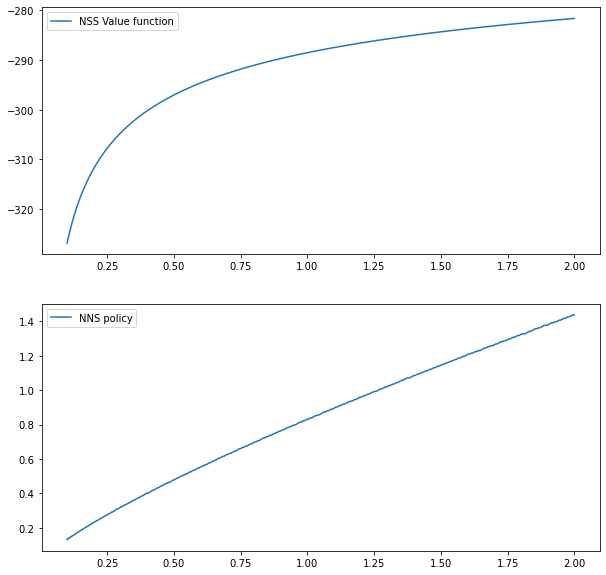

In [7]:
fig, ax  = plt.subplots(2, figsize=(10,10))
ax[0].plot(K, VNSS[3,:], label="NSS Value function")
ax[0].legend()
ax[1].plot(K, K[h_NSS[3,:]], label="NNS policy")
plt.legend()
plt.show()

In [8]:
# Stochastic VFI:

σ = 0.01  # Volatility of income.

# Construct the markov chain using rouwenhorst method:

markov = qe.markov.approximation.rouwenhorst(n= n_A, ybar = 1-ρ, sigma=σ, rho= ρ)

# Probability matrix and states:
# note that element (i,j) of P represents the transition probability
# of going to state "j" given that we are in state "i".

Π = markov.P   
A = markov.state_values  

# Initial Values:

V_0 = VNSS.copy()
V_1 = np.copy(V_0)
h_1 = h_NSS.copy()
iter = 0

while iter < max_iter:
    for r in range(n_A):
        for c in range(n_k):
            V_1[r,c] = np.nanmax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
            h_1[r,c] = np.nanargmax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)

    m = 10
    for i in range(m):
        for r in range(n_A):
            for c in range(n_k):
                V_1[r,c] = U( A[r] * K[c]**α + (1-δ) * K[c] - K[h_1[r,c]]) + β * Π[r,:] @ V_1[:,h_1[r,c]]        

    if np.amax(np.abs(V_1 - V_0))< error:
        print("Solution Found")
        print(f'Iterations', iter)
        print(f'Error', np.amax(np.abs(V_1 - V_0)))
        break

    #Howards steps: 
    
    else:
        V_0 = np.copy(V_1)
        iter += 1
        if iter >= max_iter:
            print("No solution")

Solution Found
Iterations 44
Error 7.850449776469759e-06


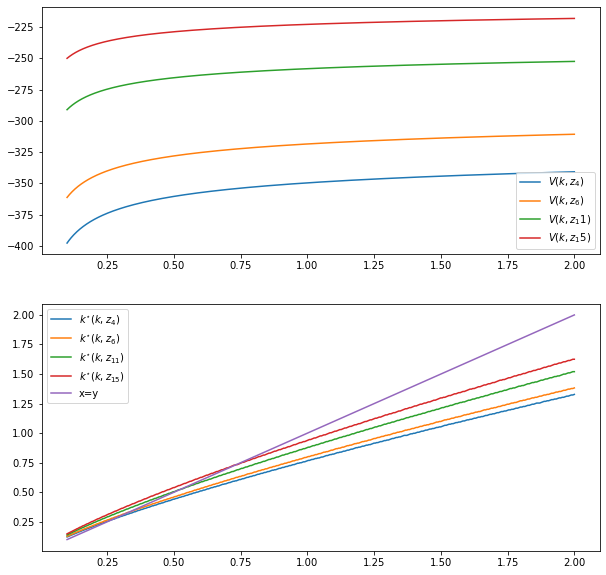

In [9]:
fig, ax  = plt.subplots(2, figsize=(10,10))
ax[0].plot(K, V_1[3,:],label=r'$V(k,z_4)$')
ax[0].plot(K, V_1[5,:], label=r'$V(k,z_6)$')
ax[0].plot(K, V_1[10,:], label=r'$V(k,z_11)$')
ax[0].plot(K, V_1[14,:], label=r'$V(k,z_15)$')
ax[0].legend()
ax[1].plot(K, K[h_1[3,:]], label=r'$k^{\star}(k,z_4)$')
ax[1].plot(K, K[h_1[5,:]], label=r'$k^{\star}(k,z_6)$')
ax[1].plot(K, K[h_1[10,:]], label=r'$k^{\star}(k,z_{11})$')
ax[1].plot(K, K[h_1[14,:]], label=r'$k^{\star}(k,z_{15})$')
ax[1].plot(K, K, label="x=y")
plt.legend()
plt.show()

In [15]:
# Utility function

def U(c):
    if (c>=0).all()>0.0001:
        return -1*((c)**(-1))
    else:
        return np.where(c <= 0.0001, np.nan, -1*(c)**(-1))

V_0 = np.ones((n_A, n_k))
V_1 = np.copy(V_0)
h_1 = np.ones((n_A, n_k), dtype=int)
iter = 0

#Interpolation Economy:
error = 10e-5 # Error tolerance.
σ = 0.01 # Volatility of income.

# Construct the markov chain using rouwenhorst method:

markov = qe.markov.approximation.rouwenhorst(n= n_A, ybar = 1-ρ, sigma=σ, rho= ρ)

# Probability matrix and states:
# note that element (i,j) of P represents the transition probability
# of going to state "j" given that we are in state "i".

Π = markov.P   
A = markov.state_values 

# Initiliaze the new code at the NSS:

V_0 = VNSS.copy()
#V_0 =np.zeros((n_A, n_k))
#h_0 = np.zeros((n_A, n_k))
h_0 = K[h_NSS.copy()]
h_int = np.zeros((n_A, n_k), dtype=float)
V_1 = np.zeros((n_A, n_k))
iter = 0

while iter < max_iter:

    for r in range(n_A):

        E_V = CubicSpline(K, Π[r,:] @ V_0 , bc_type="natural")

        for c in range(n_k):
            
            # First Obtain the interporaled expected value of V, given A today:
            # We have the array for different values for capital, we just need 
            # to get the array of expected values for the value function given
            # the choice for today.          

            def Return_f(kp):
                return -1*(U( A[r] * K[c]**α + (1-δ) * K[c] - kp) + β * E_V(kp))

            def FOC(kp):
                Δ = 10e-5
                return ((-Return_f(kp + Δ))-(-Return_f(kp - Δ)))/(2*Δ)

            #if FOC(K_max)>0:
            #    print("Grid for capital is too small")

            # We don't want to allow for states where consumption is negative:

            def ieq_neg(kp):
                return (A[r] * K[c]**α + (1-δ) * K[c] - kp)
            constraints_1 = {'type': 'ineq', 'fun': ieq_neg}
            
            # Setting the minimum capital in the continuous grid. 
            # note that this is les than K_min.

            def ieq_min(kp):
                return   kp - (K_min * 0.9)
            constraints_2 = {'type': 'ineq', 'fun': ieq_min}
           
            # Setting the maximum capital in the continuous grid. 
            # note that this is greater than K_max. 

            def ieq_max(kp):
                return - kp + (1.1 * K_max)
            constraints_3 = {'type': 'ineq', 'fun': ieq_max}
            
            h_int[r,c] = scipy.optimize.minimize(Return_f, K_min, constraints=[constraints_1, constraints_2, constraints_3], tol = 10e-7).x[0]
            
            V_1[r,c] = U( A[r] * K[c]**α + (1-δ) * K[c] - h_int[r,c]) + β * E_V(h_int[r,c])
    
    #Howard steps:
    
    m = 30
    for i in range(m):
        for r in range(n_A):
            E_V = CubicSpline(K, Π[r,:] @ V_1 , bc_type="natural")
            for c in range(n_k):
                V_1[r,c] = U( A[r] * K[c]**α + (1-δ) * K[c] - h_int[r,c]) + β * E_V(h_int[r,c])

    
    if np.amax((h_int - h_0)/(1 + np.abs(h_0)))< error:
        print("Solution Found")
        break

    else:
        print(iter)
        print(np.amax((h_int - h_0)/(1 + np.abs(h_0))))
        iter += 1
        V_0 = V_1.copy()
        h_0 = h_int.copy()
        

/var/folders/c_/9slv16s13p50vtr162z5f8th0000gn/T/ipykernel_32689/2077872332.py:5: RuntimeWarning: invalid value encountered in reciprocal
  return -1*((c)**(-1))
/var/folders/c_/9slv16s13p50vtr162z5f8th0000gn/T/ipykernel_32689/2077872332.py:7: RuntimeWarning: invalid value encountered in reciprocal
  return np.where(c <= 0.0001, np.nan, -1*(c)**(-1))


0
0.10790644527943377


/var/folders/c_/9slv16s13p50vtr162z5f8th0000gn/T/ipykernel_32689/2077872332.py:5: RuntimeWarning: divide by zero encountered in reciprocal
  return -1*((c)**(-1))


1
0.03302144746285654
2
0.02551526489363398
3
0.022802637134729978
4
0.04218022652769491
5
0.1307467746007031
6
0.08201513637955812
7
0.21770118794893673
8
0.4291721875997093
9
0.26653440579660526
10
0.2512787254981243
11
0.3514342926776285
12
0.4146356752752706


ValueError: `y` must contain only finite values.

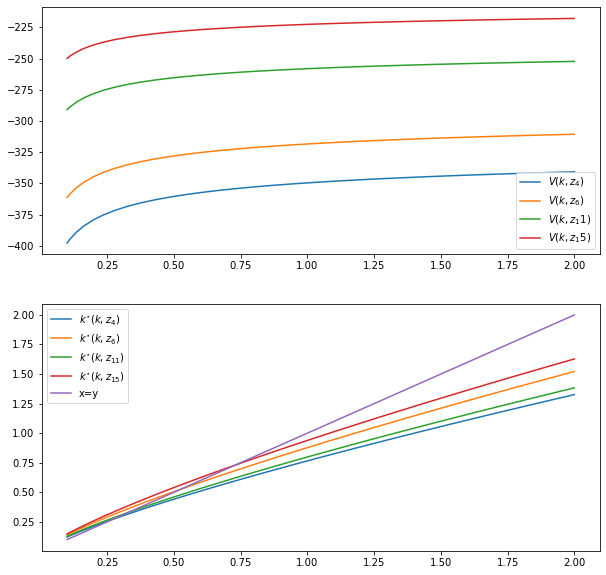

In [12]:
fig, ax  = plt.subplots(2, figsize=(10,10))
ax[0].plot(K, V_1[3,:], label=r'$V(k,z_4)$')
ax[0].plot(K, V_1[5,:], label=r'$V(k,z_6)$')
ax[0].plot(K, V_1[10,:], label=r'$V(k,z_11)$')
ax[0].plot(K, V_1[14,:], label=r'$V(k,z_15)$')
ax[0].legend()
ax[1].plot(K, h_int[3,:], label=r'$k^{\star}(k,z_4)$')
ax[1].plot(K, h_int[10,:], label=r'$k^{\star}(k,z_6)$')
ax[1].plot(K, h_int[5,:], label=r'$k^{\star}(k,z_{11})$')
ax[1].plot(K, h_int[14,:], label=r'$k^{\star}(k,z_{15})$')
ax[1].plot(K, K, label="x=y")
plt.legend()
plt.show()

Setting an initial value for the policies and the value function equal to the ones obtained in the non-stochastic version of the economy allows us to obtain a solution using just $30$ grid points. In comparison, we need more than ${500}$ grid points to get the same visual accuracy on the value function and the
same tolerance for the capital decision for equation 1 as in part (a) but using the discrete
grid.